# Diplodatos Kaggle Competition

We present this peace of code to create the baseline for the competition, and as an example of how to deal with these kind of problems. The main goals are that you:

1. Learn
1. Try different models and see which one fits the best the given data
1. Get a higher score than the given one in the current baseline example
1. Try to get the highest score in the class :)

In [1]:
# Import the required packages
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the *original* dataset...

In [2]:
original_df = pd.read_csv('../data/train.csv')

In [3]:
original_df.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber'],
      dtype='object')

In [4]:
# triptype es algo definido por walmart, numero de clases son.
# a categorical id representing the type of shopping trip the customer made. 
# This is the ground truth that you are predicting (TripType _999 is an "other" category)

# VisitNumber es el numero de visita de una persona (an id corresponding to a single trip by a single customer)

# Upc, number of the product purchased

# scanCount, the number of the given item that was purchased. A negative value indicates a product return.

# departmentDescription, que es el producto..

# FineLineNumber, es un codigo quizas del departamento.

**TripType** is the column that we should predict. That column is not present in the test set

In [5]:
original_df.describe()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber
count,453411.000000,453411.000000,4.505590e+05,453411.000000,450559.000000
mean,58.027039,95909.846115,3.075243e+10,1.108584,3727.366554
std,155.973370,55399.801147,9.163940e+10,0.707029,2779.958546
min,3.000000,5.000000,8.340000e+02,-10.000000,0.000000
25%,27.000000,49390.000000,3.400004e+09,1.000000,1404.000000
50%,39.000000,96781.000000,7.056082e+09,1.000000,3352.000000
75%,40.000000,143930.000000,3.013201e+10,1.000000,5501.000000
max,999.000000,191347.000000,9.789707e+11,71.000000,9998.000000


In [6]:
# original_df.sample(20)
original_df[original_df['TripType'].isin([41])]
# original_df[original_df['TripType'] == 8].groupby(by=['TripType','Weekday']).count()
# original_df[original_df['TripType'] == 8].groupby(by=['VisitNumber','Weekday']).count()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
11,41,12,Friday,7.603139e+09,1,BOYS WEAR,654.0
12,41,12,Friday,3.700001e+09,1,PERSONAL CARE,5050.0
13,41,12,Friday,8.853064e+10,1,BOYS WEAR,639.0
14,41,12,Friday,3.500077e+09,1,PERSONAL CARE,203.0
15,41,12,Friday,5.460011e+09,1,HOUSEHOLD CHEMICALS/SUPP,52.0
...,...,...,...,...,...,...,...
452719,41,191122,Sunday,8.815395e+10,1,MENS WEAR,1955.0
452720,41,191122,Sunday,6.811310e+10,1,PERSONAL CARE,801.0
452721,41,191122,Sunday,3.500051e+09,1,PERSONAL CARE,202.0
452722,41,191122,Sunday,4.032000e+03,1,PRODUCE,6420.0


Looking into the columns values...

In [7]:
set(original_df.Weekday)

{'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'}

In [8]:
# set(original_df.DepartmentDescription)

There are `nan`s in the column, let us find them...

In [9]:
original_df[original_df.ScanCount < 0].sort_values(by='ScanCount')

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
420942,999,178981,Saturday,7.825730e+09,-10,TOYS,4806.0
190298,35,80542,Wednesday,8.768400e+09,-9,DSD GROCERY,4624.0
403932,36,171391,Thursday,3.018755e+10,-9,BEAUTY,8506.0
117407,999,50902,Saturday,9.853000e+03,-6,BAKERY,5040.0
436143,999,185196,Sunday,8.494340e+10,-6,COOK AND DINE,2073.0
...,...,...,...,...,...,...,...
162476,26,68167,Monday,4.316869e+09,-1,HARDWARE,4514.0
162576,999,68249,Monday,7.192680e+10,-1,JEWELRY AND SUNGLASSES,496.0
162583,999,68258,Monday,2.800001e+09,-1,DSD GROCERY,4635.0
162037,999,67909,Monday,1.775432e+09,-1,FABRICS AND CRAFTS,1240.0


In [10]:
original_df[original_df.DepartmentDescription.isna()]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
739,999,484,Friday,NaN,-2,NaN,NaN
740,999,484,Friday,NaN,-2,NaN,NaN
1292,32,845,Friday,NaN,1,NaN,NaN
1293,32,845,Friday,NaN,1,NaN,NaN
1577,40,1004,Friday,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...
449840,40,190133,Sunday,NaN,1,NaN,NaN
450036,999,190182,Sunday,NaN,-1,NaN,NaN
450163,40,190230,Sunday,NaN,1,NaN,NaN
450361,39,190309,Sunday,NaN,1,NaN,NaN


When the description is NaN, then the Upc and FinelineNumber are both NaN?

sumamos los que son NaN de DepatmentDescription y los comparamos con la sumatoria de los NaN de FinelineNumber

In [11]:
(original_df.DepartmentDescription.isna().sum(),
 (original_df.DepartmentDescription.isna() & original_df.Upc.isna() & original_df.FinelineNumber.isna()).sum())

(972, 972)

In [12]:
original_df[original_df.Upc.isna()]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
739,999,484,Friday,NaN,-2,NaN,NaN
740,999,484,Friday,NaN,-2,NaN,NaN
900,5,585,Friday,NaN,1,PHARMACY RX,NaN
944,5,619,Friday,NaN,1,PHARMACY RX,NaN
945,5,619,Friday,NaN,1,PHARMACY RX,NaN
...,...,...,...,...,...,...,...
449840,40,190133,Sunday,NaN,1,NaN,NaN
450036,999,190182,Sunday,NaN,-1,NaN,NaN
450163,40,190230,Sunday,NaN,1,NaN,NaN
450361,39,190309,Sunday,NaN,1,NaN,NaN


But it may be the case that Upc is NaN but not the description...

In [13]:
(original_df.Upc.isna().sum(),
 original_df.FinelineNumber.isna().sum(),
 (original_df.FinelineNumber.isna() & original_df.Upc.isna()).sum())

(2852, 2852, 2852)

Upc and FinelineNumber are both NaN at the same time

Our last step in this analysis is to see how balanced is the data...

In [14]:
bins = set(original_df.TripType)

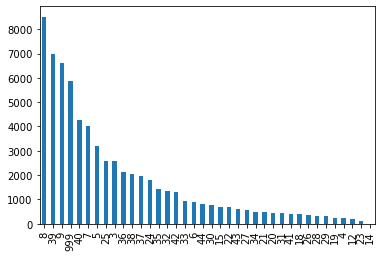

In [15]:
# to count the TripType values, we have to group the visits by VisitNumber
original_df.groupby("VisitNumber").TripType.mean().value_counts().plot(kind='bar')

**Unbalanced!!!**

Create a function to load the datasets.

**Some important decisions made here**:
1. We will use one hot encoding for Weekday and DepartmentDescription. All transformations are applied to the training and testing datasets...
1. We are handling NaN's as another category. This may not be the best approach.
1. We may have multiple records for one single visit and the goal is to classify all those records the exact same way. Therefore, we will prepare the data in a way that all the information for a visit is in the same record.
1. Based on the last bullet, we will count the DepartmentDescription for all items acquired in the same visit.
1. We drop the Upc and FinelineNumber to simplify the process. You may use it as they have a lot of information (may be using one-hot encoding for them as well)

The following operations will be performed in a function. Anyway, we present them here so that we can see them in action:

First, we drop the columns. We include TripType as we are going to treat it differently:

In [16]:
df = original_df.drop(["Upc", "FinelineNumber", "TripType"], axis=1)

In [17]:
df

,VisitNumber,Weekday,ScanCount,DepartmentDescription
0,5,Friday,-1,FINANCIAL SERVICES
1,9,Friday,1,IMPULSE MERCHANDISE
2,9,Friday,1,PRODUCE
3,9,Friday,1,PRODUCE
4,10,Friday,1,DSD GROCERY
...,...,...,...,...
453406,191344,Sunday,1,BEAUTY
453407,191344,Sunday,1,WIRELESS
453408,191344,Sunday,1,BEAUTY
453409,191347,Sunday,1,DAIRY


Now, we create the dummy columns

In [18]:
# one hot encodding se hace con get_dummies
df = pd.get_dummies(df, columns=["DepartmentDescription"], dummy_na=True)

In [19]:
df

,VisitNumber,Weekday,ScanCount,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,DepartmentDescription_BAKERY,DepartmentDescription_BATH AND SHOWER,DepartmentDescription_BEAUTY,DepartmentDescription_BEDDING,...,DepartmentDescription_SEASONAL,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS,DepartmentDescription_nan
0,5,Friday,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,Friday,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,Friday,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,Friday,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,Friday,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453406,191344,Sunday,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
453407,191344,Sunday,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
453408,191344,Sunday,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
453409,191347,Sunday,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, we group by the VisitNumber and Weekday (they should be the same), and add all values for ScanCount, and the one-hot encoding of DepartmentDescriptioin

In [20]:
df = df.groupby(["VisitNumber", "Weekday"], as_index=False).sum()

#deberia coincidor, visitNumber y weekday, comprobar.

In [21]:
df

,VisitNumber,Weekday,ScanCount,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,DepartmentDescription_BAKERY,DepartmentDescription_BATH AND SHOWER,DepartmentDescription_BEAUTY,DepartmentDescription_BEDDING,...,DepartmentDescription_SEASONAL,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS,DepartmentDescription_nan
0,5,Friday,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,Friday,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10,Friday,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,Friday,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,Friday,7,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67024,191329,Sunday,20,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
67025,191337,Sunday,27,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67026,191343,Sunday,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67027,191344,Sunday,5,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
def transform_data(train_data_fname, test_data_fname):
    df_train = pd.read_csv(train_data_fname)
    df_train['is_train_set'] = 1
    df_test = pd.read_csv(test_data_fname)
    df_test['is_train_set'] = 0

    # we  get the TripType for the train set. To do that, we group by VisitNumber and
    # then we get the max (or min or avg)
    y = df_train.groupby(["VisitNumber", "Weekday"], as_index=False).max().TripType

    # we remove the TripType now, and concat training and testing data
    # the concat is done so that we have the same columns for both datasets
    # after one-hot encoding
    df_train = df_train.drop("TripType", axis=1)
    df = pd.concat([df_train, df_test])
    
    # the next three operations are the ones we have just presented in the previous lines
    
    # drop the columns we won't use (it may be good to use them somehow)
    df = df.drop(["Upc", "FinelineNumber"], axis=1)

    # one-hot encoding for the DepartmentDescription
    df = pd.get_dummies(df, columns=["DepartmentDescription"], dummy_na=True)

    # now we add the groupby values
    df = df.groupby(["VisitNumber", "Weekday"], as_index=False).sum()
    
    # finally, we do one-hot encoding for the Weekday
    df = pd.get_dummies(df, columns=["Weekday"], dummy_na=True)

    # get train and test back
    df_train = df[df.is_train_set != 0]
    df_test = df[df.is_train_set == 0]
    
    X = df_train.drop(["is_train_set"], axis=1)
    yy = None
    XX = df_test.drop(["is_train_set"], axis=1)

    return X, y, XX, yy

Load the data...

In [23]:
X, y, XX, yy = transform_data("../data/train.csv", "../data/test.csv")

In [24]:
#la idea es predecir yy

Create the model and evaluate it

In [25]:
# split training dataset into train and "validation" 
# (we won't be using validation set in this example, because of the cross-validation;
# but it could be useful for you depending on your approach)
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)


# la evaluacion la hacemos sobre lo que nos de kaggle
# ver grafico de split, train, test, validate

In [26]:
X_valid.shape, y_valid.shape

((20109, 79), (20109,))

In [27]:
# results dataframe is used to store the computed results
results = pd.DataFrame(columns=('clf', 'best_acc'))

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()

param_grid = { 
    
}

nb_clf = GridSearchCV(nb, param_grid, cv=3, scoring='accuracy')
nb_clf.fit(X_train, y_train)
best_nb_clf = nb_clf.best_estimator_

In [29]:
print('Best accuracy: ', nb_clf.best_score_)
print(best_nb_clf)
results = results.append({'clf': best_nb_clf, 'best_acc': nb_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

Best accuracy:  0.30249360613810744
GaussianNB()
The best classifier so far is: 
GaussianNB()


In [30]:
results

,clf,best_acc
0,GaussianNB(),0.302494


In [31]:
yy_predict = results.loc[results['best_acc'].idxmax()]['clf'].predict(X_valid)

In [32]:
print(results.loc[results['best_acc'].idxmax()]['clf'])
print(accuracy_score(y_valid, yy_predict))

GaussianNB()
0.3022029936844199


### KNeighborsClassifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

param_grid = { 
    'n_neighbors': [1,5,10],
    'metric': ['euclidean', 'cosine', 'manhattan']
}

knn_clf = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
knn_clf.fit(X_train, y_train)
best_nb_clf = knn_clf.best_estimator_

In [35]:
print('Best accuracy: ', nb_clf.best_score_)
print(best_nb_clf)
results = results.append({'clf': best_nb_clf, 'best_acc': nb_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

Best accuracy:  0.30249360613810744
KNeighborsClassifier(metric='cosine', n_neighbors=10)
The best classifier so far is: 
GaussianNB()


### Paso Final, predecir yy dado XX (set de datos de test)

In [36]:
X.shape, XX.shape

((67029, 79), (28645, 79))

In [37]:
yy = results.clf.iloc[0].predict(XX)

The last thing we do is generating a file that should be *submitted* on kaggle

In [36]:
submission = pd.DataFrame(list(zip(XX.VisitNumber, yy)), columns=["VisitNumber", "TripType"])

In [37]:
submission.to_csv("../data/submissionRF1.csv", header=True, index=False)